# <a id='toc1_'></a>[__Математическая статистика__](#toc0_)

**Содержание**<a id='toc0_'></a>    
- [__Математическая статистика__](#toc1_)    
  - [__Импорты и настройки__](#toc1_1_)    
  - [__Свойства нормального распределения__](#toc1_2_)    
  - [__Закон больших чисел__](#toc1_3_)    
  - [__Центральная предельная теорема__](#toc1_4_)    
  - [__Обобщенная ЦПТ (ЦПТ Ляпунова)__](#toc1_5_)    
  - [__Свойства оценок__](#toc1_6_)    
  - [__Метод максимального правдоподобия__](#toc1_7_)    
  - [__Квантили__](#toc1_8_)    
  - [__Интервальная оценка среднего при известной дисперсии__](#toc1_9_)    
  - [__Интервальная оценка среднего при неизвестной дисперсии__](#toc1_10_)    
  - [__Bootstrap__](#toc1_11_)    
  - [__Интервальная оценка дисперсии при известном среднем__](#toc1_12_)    
  - [__Интервальная оценка дисперсии при неизвестном среднем__](#toc1_13_)    
  - [__Распределение Стьюдента__](#toc1_14_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

***
## <a id='toc1_1_'></a>[__Импорты и настройки__](#toc0_)

In [1]:
from scipy.integrate import quad
from scipy.optimize import minimize, root
from scipy.special import erf
from scipy.stats import (
    bootstrap, chi2, describe, 
    expon, norm, t as stud, uniform
)
from sympy import Symbol
from sympy.stats import density, Die, E, Normal, sample
import matplotlib, matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [2]:
# разрешение графиков по умолчанию
matplotlib.rcParams['figure.dpi'] = 400

***
## <a id='toc1_2_'></a>[__Свойства нормального распределения__](#toc0_)

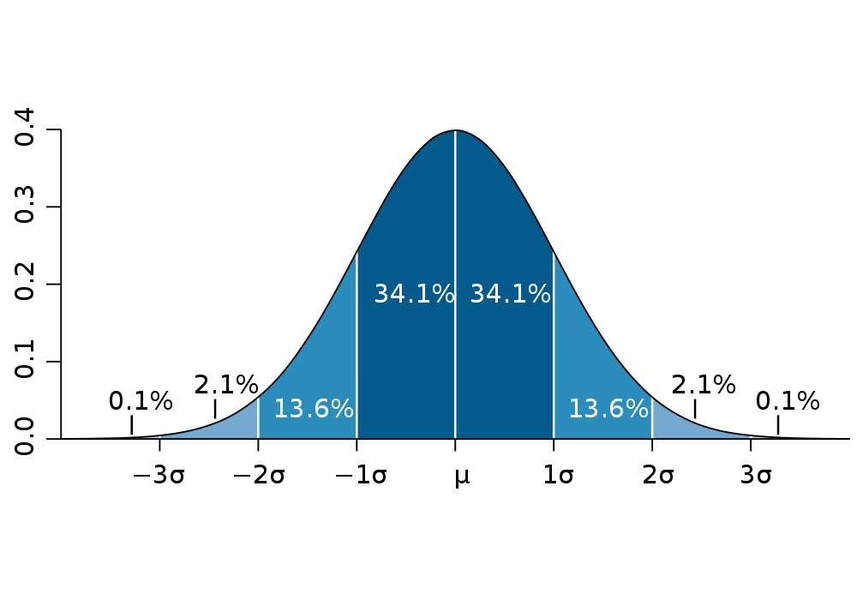

Плотность вероятности непрерывной с.в., имеющей нормальный закон распределения (закон Гаусса) с параметрами $a$ и $\sigma^2$:

$$\Large \varphi_N(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-a)^2}{2\sigma^2}},$$

$$\text{E}(X) = a,\,\text{D}(X) = \sigma^2$$

Функция распределения с.в. $X$ через функцию Лапласа $\Phi(x)$:

$$\text{F}_N(x) = \frac{1}{2} + \frac{1}{2}\Phi\biggl(\frac{x-a}{\sigma}\biggr),$$

$$\Phi(x) = \frac{2}{\sqrt{2\pi}} \int_0^x e^{\frac{-t^2}{2}}\,dt = \frac{1}{\sqrt{2\pi}} \int_{-x}^x e^{\frac{-t^2}{2}}\,dt$$

Посмотрим, какая доля вероятностной массы нормального распределения заключена соответственно в интервалах $(-\sigma,\sigma)$, $(-2\sigma,2\sigma)$, $(-3\sigma,3\sigma)$.

__Способ 1__. Воспользуемся функцией распределения:

In [3]:
f = lambda x: norm.cdf(x) - norm.cdf(-x)
[f(sigma) for sigma in range(1, 4)]

[0.6826894921370859, 0.9544997361036416, 0.9973002039367398]

__Способ 2__.
$$\textbf{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}\,dt = \overbrace{\Phi(x\sqrt{2})}^{\text{Кремер, с.161}}$$

$$\text{F}(x) = \frac{1 + \textbf{erf}(x/\sqrt{2})}{2}$$

$$\text{F}(x) - \text{F}(-x) = \frac{1}{2} \biggl(\textbf{erf}\biggl(\frac{x}{\sqrt{2}}\biggr) - \textbf{erf}\biggl(-\frac{x}{\sqrt{2}}\biggr)\biggr)$$

* [__Функция ошибок Гаусса__](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA)
* [__CDF and ERF relation__](https://stats.stackexchange.com/questions/187828/how-are-the-error-function-and-standard-normal-distribution-function-related)
* [__scipy.special.erf__](https://scipy.github.io/devdocs/reference/generated/scipy.special.erf.html#scipy-special-erf)
* [__The Gauss error function__](https://docs.sympy.org/latest/modules/functions/special.html?highlight=erf#sympy.functions.special.error_functions.erf)

In [4]:
g = lambda x: 1/2 * (erf(x / np.sqrt(2)) - erf(-x / np.sqrt(2)))
[g(x) for x in range(1, 4)]

[0.6826894921370859, 0.9544997361036416, 0.9973002039367398]

In [5]:
f = lambda x: 1/2 * (sym.erf(x / sym.sqrt(2)) - sym.erf(-x / sym.sqrt(2)))
[f(x).evalf() for x in range(1, 4)]

[0.682689492137086, 0.954499736103642, 0.997300203936740]

__Способ 3__. Проверим результат интегрированием плотности вероятности в тех же пределах:

In [6]:
[quad(norm.pdf, -sigma, sigma)[0] for sigma in range(1, 4)]

[0.682689492137086, 0.9544997361036417, 0.9973002039367399]

In [7]:
x = Symbol('x')
N = Normal('N', 0, 1)
pdf = density(N)(x)
pdf

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

In [8]:
[sym.integrate(pdf, (x, -s, s)).evalf() for s in range(1, 4)]

[0.682689492137086, 0.954499736103642, 0.997300203936740]

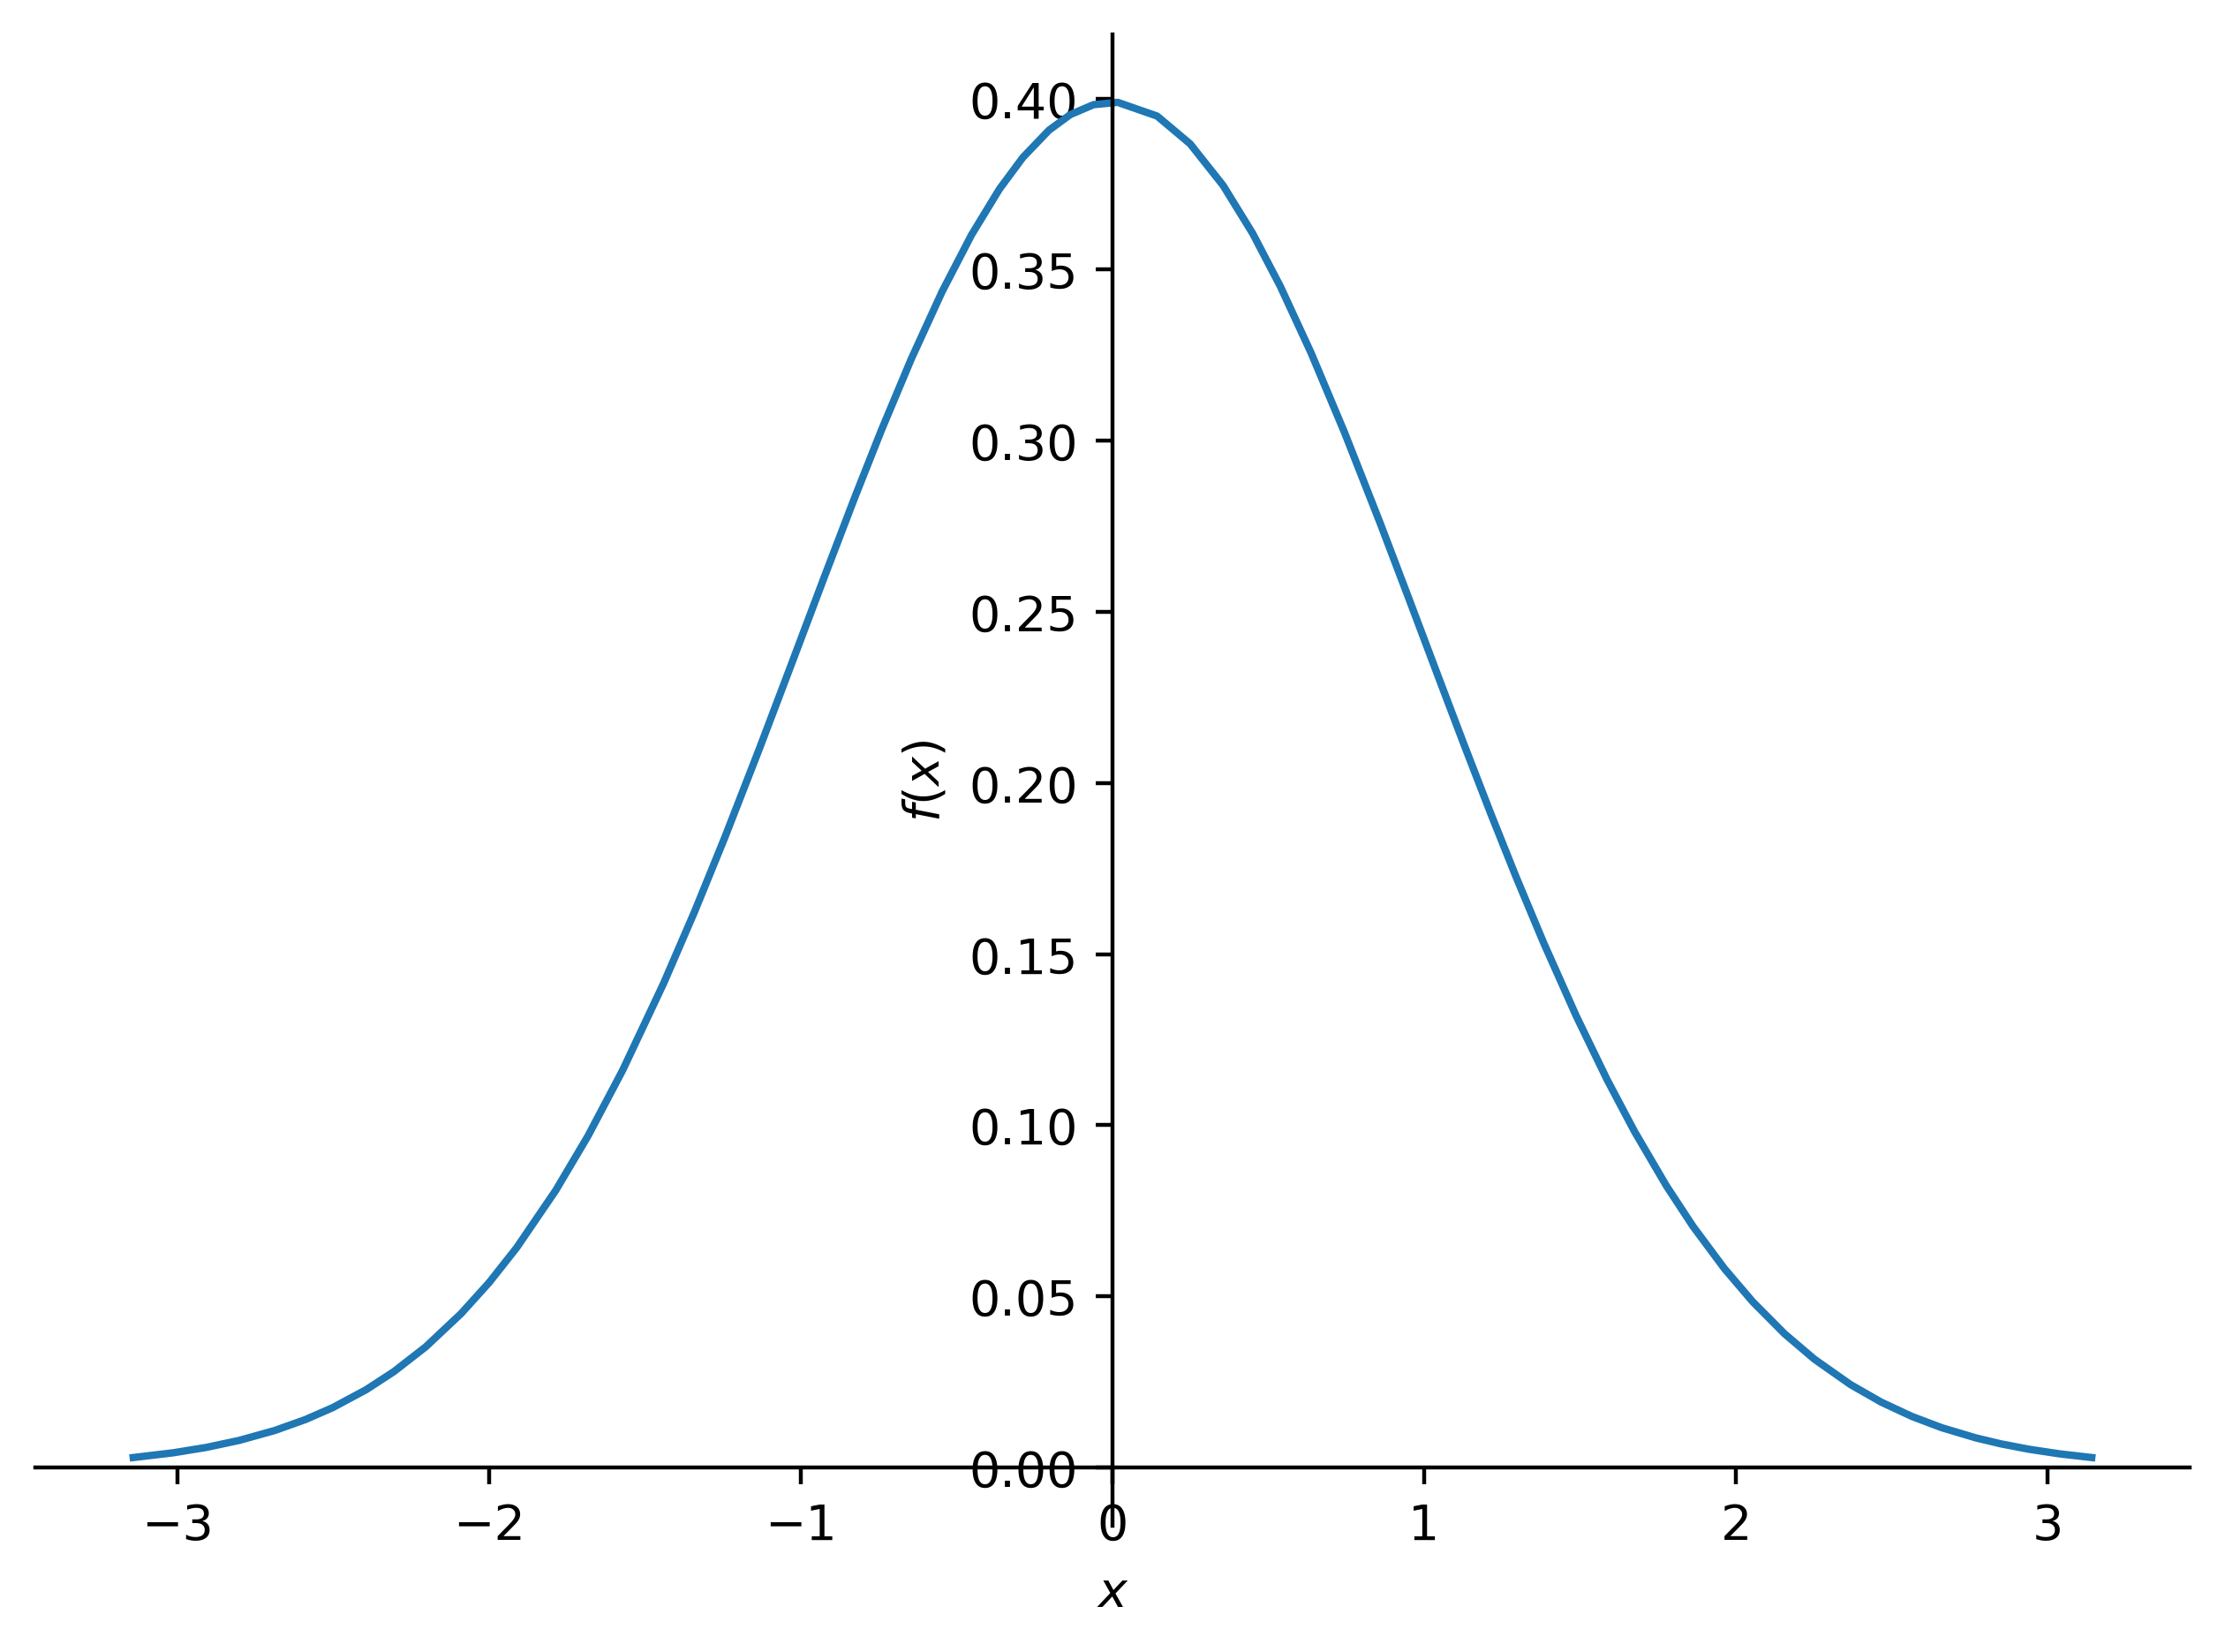

In [9]:
sym.plot(pdf, (x, -sym.pi, sym.pi))

Как видно, в ~$99.7\%$ случаях значение нормально распределенной случайной величины отклоняется от среднего не более, чем на $3\sigma$. Поэтому на практике хорошо работает __"правило трех сигм"__: _практически достоверно_, что значения нормально распределенной случайной величины заключены в интервале $(\mu-3\sigma,\mu+3\sigma)$.

Примерно $68\%$ значений из нормального распределения расположены не далее чем в одном стандартном отклонении от среднего — сосредоточены в интервале $(-\sigma,\sigma)$. А между какими значениями заключены центральные $50\%$?

Очевидно, что, поскольку нормальное распределение обладает осевой симметрией, центральные пятьдесят процентов заключены между его $25$-ым и $75$-ым квантилями:

In [10]:
left = norm.ppf(0.25)
right = norm.ppf(0.75)
left, right

(-0.6744897501960817, 0.6744897501960817)

In [11]:
# проверка №1
norm.cdf(right) - norm.cdf(left)

0.5

In [12]:
# проверка №2
g = lambda x: norm.cdf(x) - norm.cdf(-x) - 0.5
result = root(g, x0=0.6)  # x0, initial guess, стартовая точка оптимизации
result

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 6.745e-01]
    nfev: 7
    fjac: [[-1.000e+00]]
       r: [-6.356e-01]
     qtf: [ 2.063e-13]

In [13]:
result.x.item()

0.6744897501960816

***
## <a id='toc1_3_'></a>[__Закон больших чисел__](#toc0_)

Пусть $\xi_1,\xi_2,...,\xi_n,...$ - бесконечная последовательность независимых одинаково распределенных случайных величин, имеющих конечное матожидание $\mu$. Обозначим среднее арифметическое первых $n$ случайных величин $\xi_1,\xi_2,...,\xi_n$ так:

$$\overline{\xi}_n = \frac{1}{n} \sum_{i=1}^{n} \xi_i.$$

Тогда для любого $\varepsilon > 0$:

$$\lim_{n \to +\infty} P(|\overline{\xi}_n - \mu| < \varepsilon) = 1.$$

В таких случаях говорят, что ряд случайных величин ${\overline{\xi}_n}$ сходится к $\mu$ по вероятности.
<br>ЗБЧ показывает, что для любого положительного $\varepsilon$ вероятность того, что $\overline{\xi}_n​$ отклоняется от $\mu$ больше, чем на $\varepsilon$ стремится к $0$ при $n \to +\infty$.

__Пример__.

In [14]:
D = Die('D')
sizes = np.geomspace(10, 1e6, num=6, dtype=int)  # 10**np.arange(1, 7)
sizes

array([     10,     100,    1000,   10000,  100000, 1000000])

In [15]:
f = lambda size: np.mean(sample(D, size=size))
means = np.vectorize(f)(sizes)
means

array([2.8     , 3.35    , 3.455   , 3.5386  , 3.49441 , 3.498649])

In [16]:
x = np.arange(1, 7)
p = np.array([1/6] * 6)
M = x @ p
M

3.5

In [17]:
E(D)

7/2

С ростом размера выборки отклонение среднего от матожидания сокращается:

In [18]:
np.abs(means - M)

array([0.7     , 0.15    , 0.045   , 0.0386  , 0.00559 , 0.001351])

_Верблюд пройдет в игольное ушко $\varepsilon$, каким бы маленьким оно ни было._

***
## <a id='toc1_4_'></a>[__Центральная предельная теорема__](#toc0_)

__Постановка вопроса о точности, пример__. Оценить долю владельцев кошек таким образом, чтобы с вероятностью хотя бы $95\%$ погрешность в оценке составила не более $2\%$. Другими словами, с вероятностью хотя бы $95\%$ наша оценка доли владельцев отличается от реальной доли владельцев не более, чем на $2\%$.

Пусть $\xi_1,\xi_2,...,\xi_n,...$ — бесконечная последовательность независимых одинаково распределенных случайных величин, имеющих конечное матожидание $\mu$ и дисперсию $\sigma^2$. Пусть с.в. $\overline{\xi}_n$ — выборочное среднее $n$ случайных величин $\xi_1,\xi_2,...,\xi_n$:

$$\overline{\xi}_n := \frac{1}{n} \sum_{i=1}^{n} \xi_i.$$

Для примера с владельцами кошек $\xi$ это с.в., равная $1$, если у $i$-го опрошенного есть кот, и $0$ otherwise. $\overline{\xi}_n$ — доля владельцев кошек среди первых $n$ опрошенных.

$$\text{E}(\overline{\xi}_n) = \text{E}\Biggl(\frac{1}{n}\sum_{i=1}^{n} \xi_i\Biggr) = \frac{1}{n}(n\mu) = \mu$$

$$\text{D}(\overline{\xi}_n) = \frac{1}{n^2} \cdot \text{D}\Biggl(\sum_{i=1}^{n} \xi_i\Biggr) = \frac{1}{n^2}(n\sigma^2) = \frac{\sigma^2}{n}.$$

$\frac{\overline{\xi}_n - \mu}{\sigma/\sqrt{n}}$ сходится по распределению при $n \to +\infty$ к $N(0,1)$

$$\overline{\xi}_n \longrightarrow N\biggl(\mu,\frac{\sigma^2}{n}\biggr)$$

$$\sum_{i=1}^{n} \xi_i \longrightarrow N(n\mu,n\sigma^2)$$

__Пример__. Пусть $\xi_1,\xi_2,...,\xi_{100}$ — результаты подбрасывания честной монеты. Обозначим за $\eta_{100}:=\sum_{i=1}^{100}\xi_i$ число выпавших орлов. Тогда, согласно ЦПТ, мы можем считать, что $\eta_{100}$​ имеет распределение, близкое к нормальному распределению $N(n\mu,n\sigma^2)$.

Поскольку монета честная, $\xi_i$ ~ $\text{Ber}_{p=0.5}$. Следовательно,

$$n\mu = 100 \cdot \text{E}(\xi_i) = 100p = 100 \cdot 0.5 = 50$$

$$n\sigma^2 = 100 \cdot \text{D}(\xi_i) = 100p(1-p) = 100 \cdot 0.25 = 25 = 5^2$$

Значит, $\eta_{100}$ ~ $N(50,5^2)$.

Применим _правило двух сигм_, накрывающих центральные $95\%$ распределения. $2\sigma = 2 \cdot 5 = 10$. Можно сказать, что с вероятностью $95\%$ среди $100$ подбрасываний честной монеты будет от $50-10=40$ до $50+10=60$ орлов. Другими словами, с вероятностью $95\%$ суммарное число орлов отклонится от среднего не более, чем на $\frac{10}{50} \cdot 100\% = 20\%$.

Аналогично для, например, $\eta_{900}$:

$$n\mu = 900 \cdot 0.5 = 450$$

$$n\sigma^2 = 900 \cdot 0.25 = 225 = 15^2$$

$$2\sigma = 2 \cdot 15 = 30$$

Значит, с вероятностью $95\%$ среди $900$ подбрасываний честной монеты будет от $450-30=420$ до $450+30=480$ орлов. Другими словами, с вероятностью $95\%$ суммарное число орлов отклонится от среднего не более, чем на $\frac{30}{450} \cdot 100\% = 6.67\%$.

__Пример__. Дана несимметричная монета, имеющая распределение Бернулли с параметром $p=0.25$: $P(\xi_i = 1) = 0.25,\;P(\xi_i = 0) = 1-0.25=0.75$. Используя ЦПТ, найти параметры нормального распределения, к которому близко распределение величины $\eta_{100}=\sum_{i=1}^{100}\xi_i$.
$$\mu = 100p = 100 \cdot 0.25 = 25$$

$$\sigma = \sqrt{100p(1-p)} = \sqrt{25 \cdot 0.75} \approx 4.33$$

Дисперсия с.в., имеющей распределение Бернулли с параметром $p \in [0,1]$ не превышает максимальной $\text{D}(p=0.5) = 0.5 \cdot (1-0.5) = 0.25$. Значит, стандартное отклонение такой с.в. $\sigma \leqslant \sqrt{0.25} = 0.5$.

Пусть $\hat{p}$​ — доля владельцев кошек среди $100$ опрошенных, т.е. оценка реальной доли владельцев $p$. Пусть $\sigma$ — стандартное отклонение распределения Бернулли с параметром $p$. Тогда, согласно ЦПТ, можно считать, что оценка $\hat{p}$​ имеет распределение, близкое к нормальному, со стандартным отклонением $\frac{\sigma}{\sqrt{100}} = \frac{\sigma}{10}$.

Из правила двух сигм следует, что с вероятностью $95\%$ оценка $\hat{p}$ отклоняется от реальной $p$ не более, чем на $2 \cdot \frac{\sigma}{10} = \frac{\sigma}{5} \leqslant \frac{0.5}{5} = 0.1$​.

***
## <a id='toc1_5_'></a>[__Обобщенная ЦПТ (ЦПТ Ляпунова)__](#toc0_)

Сумма большого количества независимых случайных величин с сопоставимыми (близкими) дисперсиями (слабо зависимых случайных факторов, ни один из которых не имеет решающего значения) имеет распределение, близкое к нормальному.

Отличие от ЦПТ — нет требования, чтобы случайные величины были распределены одинаково.

***
## <a id='toc1_6_'></a>[__Свойства оценок__](#toc0_)

__Оценкой $\tilde{\theta}_n$ параметра__ $\theta$ называют всякую функцию результатов наблюдений над случайной величиной $X$ (иначе — статистику), с помощью которой судят о значении параметра $\theta$:

$$\tilde{\theta}_n = \tilde{\theta}_n(X_1,X_2,...,X_n)$$

Поскольку $X_1,X_2,...,X_n$ — случайные величины, то и оценка $\tilde{\theta}_n$ (в отличие от оцениваемого параметра $\theta$ — величины неслучайной, детерминированной) является случайной величиной, зависящей от закона распределения случайной величины $X$ и числа $n$.

Оценка $\tilde{\theta}_n$ параметра $\theta$ называется __несмещенной__, если ее математическое ожидание равно оцениваемому параметру, т.е.

$$\text{E}(\tilde{\theta}_n) = \theta$$

Несмещенная оценка дисперсии:

$$\tilde{\text{D}} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

In [19]:
x = np.array([3, 6, 14, 7, 20])
x.var(ddof=1)  # delta degrees of freedom

47.5

Оценка $\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2$ смещена вниз.

Оценка $\tilde{\theta}_n$ параметра $\theta$ называется __состоятельной__, если она удовлетворяет закону больших чисел, т.е. сходится по вероятности к оцениваемому параметру:

$$\lim_{n \to +\infty}P(|\tilde{\theta}_n - \theta| < \varepsilon) = 1$$

Несмещенная оценка $\tilde{\theta}_n$ параметра $\theta$ называется __эффективной__, если она имеет наименьшую дисперсию среди всех возможных несмещенных оценок параметра $\theta$, вычисленных по выборкам одного и того же объема $n$.

***
## <a id='toc1_7_'></a>[__Метод максимального правдоподобия__](#toc0_)

__Пример__. Поиск оценки $\theta$, при которой вероятность получить из $N(\theta,1)$ выборку $(6,4,7)$ максимальна. 

In [20]:
x, t = sym.symbols('x theta')
N = Normal('N', t, 1)
pdf = density(N)(x)
pdf

sqrt(2)*exp(-(-theta + x)**2/2)/(2*sqrt(pi))

In [21]:
(pdf.subs(x, 6) * pdf.subs(x, 4) * pdf.subs(x, 7)).simplify()

sqrt(2)*exp(-3*theta**2/2 + 17*theta - 101/2)/(4*pi**(3/2))

In [22]:
sym.solve(sym.diff(-3/2*t**2 + 17*t - 101/2, t))

[5.66666666666667]

In [23]:
f = lambda t: (6 - t)**2 + (4 - t)**2 + (7 - t)**2
result = minimize(f, x0=4)
result.x.item()

5.66666666601095

In [24]:
sym.solve(sym.diff(f(t), t))

[17/3]

__Пример__. Монета, которая выпадает орлом с вероятностью $p$ и решкой с вероятностью $(1-p)$, подброшена $10$ раз: $6$ орлов, $4$ решки. Оценить параметр $p$ ММП.

In [25]:
# maximize(f) -> minimize(-f)
f = lambda p: -p**6 * (1 - p)**4
result = minimize(f, x0=0.5)
result.x.item()

0.5999967750904088

__Пример__. По выборке из равномерного распределения на отрезке $[a,b]$ оценить параметры $a,b$ ММП.

In [26]:
sample = [2, 7, 4, 10, 3, 1, 15, 21]
a, scale = uniform.fit(sample)
a, a + scale

(1.0, 21.0)

In [27]:
describe(sample).minmax

(1, 21)

__Пример__. По выборке из экспоненциального распределения с неизвестным параметром $\lambda$ оценить $\lambda$ ММП.

$$\varphi(x) = \begin{cases}\lambda e^{-\lambda x}, & x\geqslant0 \\ 
0, & x<0\end{cases}$$

In [28]:
sample = [3, 5, 2, 3, 2, 1, 4, 10, 15]
scale = expon.fit(sample, floc=0)[1]
1 / scale

0.2

***
## <a id='toc1_8_'></a>[__Квантили__](#toc0_)

Пусть дана непрерывная случайная величина $X$ с функцией распределения $F$ и число $\alpha \in (0,1)$. Тогда $\alpha$-__квантилем__ $X$ называется число $x_{\alpha} \in \R$ такое, что $F(x_{\alpha}) = P(X \leqslant x_{\alpha}) = \alpha$.

__Пример__.

In [29]:
proba = [0.025, 0.05, 0.95, 0.975]
[norm.ppf(p, loc=0, scale=1) for p in proba]

[-1.9599639845400545,
 -1.6448536269514729,
 1.6448536269514722,
 1.959963984540054]

***
## <a id='toc1_9_'></a>[__Интервальная оценка среднего при известной дисперсии__](#toc0_)

__Интервальной оценкой__ параметра $\theta$ называется числовой интервал, который с заданной вероятностью ___накрывает___ неизвестное значение параметра $\theta$.

__Важно!__ Методика ниже работает только если распределение нормально. Если распределение может быть любым, то построить доверительный интервал для среднего нельзя.

Дана выборка из нормального распределения $N(\mu,\sigma^2)$, $\sigma^2$ известна. Требуется построить интервальную оценку $\mu$ с уровнем доверия $\alpha = 0.95$. 

Другими словами, мы хотим описать процедуру, которая на вход получает выборку размера $n$ из $N(\mu,\sigma^2)$, а на выход выдаeт интервал. При этом с вероятностью $0.95$ число $\mu$ будет лежать в этом интервале. 

__Важно!__ Для любого конкретного построенного интервала неизвестное число $\mu$ уже либо лежит в этом интервале, либо не лежит. Вероятность $0.95$ __относится к процедуре__ — если мы будем брать много iid выборок размера $n$ и применять к ним нашу процедуру, то в $95\%$ случаев построенный интервал будет содержать $\mu$. 

$$y \sim \frac{x_1+...+x_n}{n} \sim N\left(\mu,\frac{\sigma^2}{n}\right)$$

$$y_{0.025} \approx \mu - 1.96 \frac{\sigma}{\sqrt{n}}$$

$$y_{0.975} \approx \mu + 1.96 \frac{\sigma}{\sqrt{n}}$$

Вероятность того, что $\frac{x_1+...+x_n}{n}$ попадет в интервал $[y_{0.025},y_{0.975}] = \biggl[\mu - 1.96 \frac{\sigma}{\sqrt{n}},\mu + 1.96 \frac{\sigma}{\sqrt{n}}\biggr]$ равна $0.95$. Значит, $\mu$ лежит в $\biggl[\frac{x_1+...+x_n}{n} - 1.96 \frac{\sigma}{\sqrt{n}},\frac{x_1+...+x_n}{n} + 1.96 \frac{\sigma}{\sqrt{n}}\biggr]$ с вероятностью $0.95$.

$$P\biggl(\bar{x} - q_{0.975}\frac{\sigma}{\sqrt{n}} \leqslant \mu \leqslant \bar{x} - q_{0.025}\frac{\sigma}{\sqrt{n}}\biggr) = 0.95$$

$$P\biggl(\bar{x} - 1.96\frac{\sigma}{\sqrt{n}} \leqslant \mu \leqslant \bar{x} + 1.96\frac{\sigma}{\sqrt{n}}\biggr) = 0.95$$

$$P\biggl(\bar{x} - q_{\frac{1+\alpha}{2}}\frac{\sigma}{\sqrt{n}} \leqslant \mu \leqslant \bar{x} - q_{\frac{1-\alpha}{2}}\frac{\sigma}{\sqrt{n}}\biggr) = \alpha$$

Размер доверительного интервала зависит от размера выборки: чем больше $n$, тем __меньше__ доверительный интервал. Иначе говоря, чем больше выборка, тем точнее известно, где находится $\mu$.

__Пример__. По данной выборке из $N(\mu,9)$ построить доверительный интервал для $\mu$ с уровнем доверия $\alpha=0.95$.

In [30]:
sample = np.array([6, -4, 5, 2, 1, 4, 1, 0, 3])
s2, alpha = 9, 0.95
mu = sample.mean()
sigma = np.sqrt(s2 / sample.size)

In [31]:
# руками
mu - norm.ppf((1 + alpha)/2) * sigma

0.04003601545994595

In [32]:
mu - norm.ppf((1 - alpha)/2) * sigma

3.959963984540054

In [33]:
# методом
norm.interval(alpha, loc=mu, scale=sigma)

(0.04003601545994595, 3.959963984540054)

$N(\mu,3),\;\alpha=0.99$:

In [34]:
sample = [2, 6, 1, 0, -1, -5]
s2, alpha = 3, 0.99
norm.interval(alpha, loc=np.mean(sample), scale=np.sqrt(s2 / len(sample)))

(-1.3213863677184496, 2.32138636771845)

***
## <a id='toc1_10_'></a>[__Интервальная оценка среднего при неизвестной дисперсии__](#toc0_)

__Важно!__ Методика ниже работает только если распределение нормально. Если распределение может быть любым, то построить доверительный интервал для среднего нельзя.

Дана выборка из нормального распределения $N(\mu,\sigma^2)$, $\sigma^2$ неизвестна.

$$\bar{x} = \frac{x_1+...+x_n}{n} \sim N\left(\mu,\frac{\sigma^2}{n}\right)$$

$$\frac{\bar{x} - \mu}{\sqrt{\sigma^2/n}} \sim N(0,1)$$

$$\sigma^2 \rightarrow \bar{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

Тогда $\frac{\bar{x} - \mu}{\sqrt{\bar{\sigma}^2/n}} \sim t_{(n-1)}$ — __распределение Стьюдента__ с $(n-1)$ степенью свободы.

$$P\biggl(\bar{x} - t_{\frac{1+\alpha}{2},(n-1)}\cdot\sqrt{\bar{\sigma}^2/n} \leqslant \mu \leqslant \bar{x} - t_{\frac{1-\alpha}{2},(n-1)}\cdot\sqrt{\bar{\sigma}^2/n}\biggr) = \alpha$$ 

Распределение Стьюдента не зависит от $\mu$ и $\sigma$.

__Пример__. По данной выборке из $N(\mu,\sigma^2)$ с неизвестными параметрами $\mu$ и $\sigma$ построить доверительный интервал для $\mu$ c уровнем доверия $\alpha=0.95$.

In [35]:
sample = np.array([4, 1, 4])
alpha = 0.95
n = sample.size
mu = sample.mean()
sigma = np.sqrt(sample.var(ddof=1) / n)

In [36]:
# руками
mu - stud.ppf((1 + alpha)/2, df=n-1) * sigma

-1.3026527299112747

In [37]:
mu - stud.ppf((1 - alpha)/2, df=n-1) * sigma

7.302652729911275

In [38]:
# методом
stud.interval(alpha, df=n-1, loc=mu, scale=sigma)

(-1.3026527299112747, 7.302652729911275)

***
## <a id='toc1_11_'></a>[__Bootstrap__](#toc0_)

__Бутстрепом__ называют процедуру ресемплирования с повторением (resampling with replacement). Бутстреп это обобщенное название техники построения псевдовыборок. Статистика же, рассчитываемая по псевдовыборкам, произвольна. 

Пусть имеется выборка из произвольного неизвестного распределения, и требуется хоть как-то, худо-бедно, но построить доверительный интервал для среднего. По каждой из $n=(1000\div2000)$ псевдовыборок считается среднее. Размер псевдовыборки обычно выбирается равным размеру изначальной выборки. Полученный массив из $n$ средних сортируется по неубыванию. Для построения доверительного интервала $\alpha$ отбрасываются первые и последние $\bigl(\frac{1-\alpha}{2} \cdot n\bigr)$ элементов. Либо в качестве границ доверительного интервала назначаются полусуммы порядковых статистик. Например, для $n=1000,\;\alpha=0.95$: $\frac{e_{25} + e_{26}}{2}$ и $\frac{e_{975} + e_{976}}{2}$. Истинное среднее рассматривается не как одно число, а как случайная величина. Полученные $1000$ чисел описывают распределение этой случайной величины. Процедура выше описывает, как построить интервал, в который эта случайная величина попадет с вероятностью $95\%$. Границы этого интервала это $0.025$-квантиль и $0.975$-квантиль распределения этой случайной величины.

__Пример__.

In [39]:
sample = np.array([[11, 2, 8]])

intervals = {bootstrap(sample, np.mean, n_resamples=1000, confidence_level=.6, 
                       random_state=rs).confidence_interval
             for rs in range(100)}

intervals

{ConfidenceInterval(low=4.0, high=8.0),
 ConfidenceInterval(low=4.0, high=9.0),
 ConfidenceInterval(low=4.447554747893832, high=9.0),
 ConfidenceInterval(low=4.872904489164313, high=9.0),
 ConfidenceInterval(low=5.0, high=8.0),
 ConfidenceInterval(low=5.0, high=8.996453231343708),
 ConfidenceInterval(low=5.0, high=9.0)}

In [40]:
len(intervals)

7

In [41]:
# naive approach
means = np.array([8,2,10,6,2,11,5,7,4,9])
alpha = 0.6

means = np.sort(means)
L = int((1 - alpha)/2 * means.size)
R = means.size - L - 1

means[L], means[R]

(4, 9)

***
## <a id='toc1_12_'></a>[__Интервальная оценка дисперсии при известном среднем__](#toc0_)

Дана выборка $x_1,...,x_n$ из $N(\mu,\sigma^2)$, $\mu$ известно.

$$x_i \sim N(\mu,\sigma^2)$$

$$\frac{x_i - \mu}{\sigma} \sim N(0,1)$$

Для каждого $i$ возведем в квадрат и сложим:
$$\sum_{i=1}^{n}\frac{(x_i - \mu)^2}{\sigma^2} = \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{\sigma^2} \sim \chi^2_n$$

Полученная величина имеет __распределение хи-квадрат__ с $n$ степенями свободы.

$$P\biggl(l_{\frac{1-\alpha}{2},n} \leqslant \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{\sigma^2} \leqslant l_{\frac{1+\alpha}{2},n}\biggr) = \alpha$$

$$P\Biggl(\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{l_{\frac{1+\alpha}{2},n}} \leqslant \sigma^2 \leqslant \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{l_{\frac{1-\alpha}{2},n}}\Biggr) = \alpha$$

Доверительный интервал:
$$\Biggl[\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{l_{\frac{1+\alpha}{2},n}},\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{l_{\frac{1-\alpha}{2},n}}\Biggr]$$

Иногда полезнее оценивать дисперсию только сверху, поскольку снизу она в любом случае ограничена нулем. Тогда вместо двух неравенств с $\frac{1-\alpha}{2}$-квантилем и $\frac{1+\alpha}{2}$-квантилем нужно брать только одно неравенство с $(1-\alpha)$-квантилем:

$$P\Biggl(l_{1-\alpha,n} \leqslant \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{\sigma^2}\Biggr) = \alpha$$

Тогда доверительный интервал:
$$\Biggl[0, \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{l_{1-\alpha,n}}\Biggr].$$

Функция на оба случая (среднее известно, среднее неизвестно):

In [42]:
def chi2VarConfInterval(sample, *, alpha, mu=None):
    sample = np.asarray(sample)
    avg, fix = (sample.mean(), 1) if mu is None else (mu, 0)
    S = ((sample - avg)**2).sum()
    df = sample.size - fix
    return tuple(S / chi2.ppf((1 + j*alpha)/2, df=df) for j in (1, -1))

In [43]:
chi2VarConfInterval([3, 5, 4, 6, -3], mu=3, alpha=0.95)

(3.896356300841499, 60.15315376822784)

***
## <a id='toc1_13_'></a>[__Интервальная оценка дисперсии при неизвестном среднем__](#toc0_)

Дана выборка $x_1,...,x_n$ из $N(\mu,\sigma^2)$, $\mu$ неизвестно.

$$\mu \rightarrow \bar{x} : \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{\sigma^2} \rightarrow \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{\sigma^2}$$

В числителе — смещенная выборочная дисперсия, имеющая __распределение хи-квадрат__ $\chi^2_{n-1}$ с $(n-1)$ степенью свободы.

Вывод аналогичен случаю выше. Доверительный интервал:
$$\Biggl[\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{l_{\frac{1+\alpha}{2},n-1}},\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{l_{\frac{1-\alpha}{2},n-1}}\Biggr]$$



In [44]:
chi2VarConfInterval([1, 6, 4, 5, -1], alpha=0.95)

(3.051164406474203, 70.18723684821269)

***
## <a id='toc1_14_'></a>[__Распределение Стьюдента__](#toc0_)

Пусть $Z$ и $L$ независимы и имеют распределения $N(0,1)$ и хи-квадрат с $k$ степенями свободы соответственно. Тогда распределение величины $\frac{Z}{\sqrt{L/k}}$ называется __распределением Стьюдента__ с $k$ степенями свободы.

***